(150, 4)


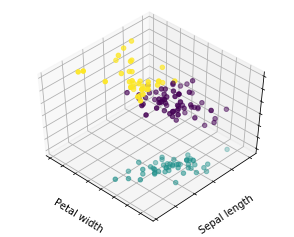

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
78.9408414261
[2]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

# Prepare dataset
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
print X.shape

# Run KMeans clustering algorithm.
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_

# Draw label and data.
fignum=1
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

# Print metrics and run prediction.
print model.cluster_centers_
print model.inertia_
print model.predict(np.array([8, 8, 8, 2]).reshape(1, -1))

(1500, 2)


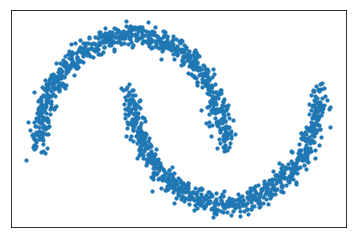

In [2]:
from sklearn import metrics

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
moons = datasets.make_moons(n_samples=1500, noise=0.05)
X, y = moons
print X.shape

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xticks(())
plt.yticks(())
plt.show()

## K-Means 分群演算法

![title](img/kmeans.png)

圖片來源: http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

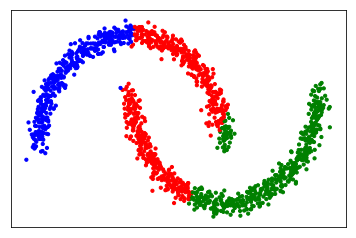

[[-0.63152005  0.63668531]
 [ 1.4273216  -0.17012724]
 [ 0.40720767  0.37216088]]
406.010254738
Homogeneity: 0.435
Completeness: 0.279
V-measure: 0.340
Adjusted Rand Index: 0.282
Adjusted Mutual Information: 0.279
Silhouette Coefficient: 0.426


In [5]:
model = KMeans(n_clusters=3, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
#         The final results will be the best output of n_init consecutive runs in terms of inertia.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# algorithm: The classical EM-style algorithm is “full”. 
#            The “elkan” variation is more efficient by using the triangle inequality, 
#            but currently doesn’t support sparse data. 
#           “auto” chooses “elkan” for dense data and “full” for sparse data.
# tol: Relative tolerance with regards to inertia to declare convergence
model.fit(X)
labels = model.labels_

plt.scatter(X[:, 0], X[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.cluster_centers_
print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

## DBSCAN 分群演算法



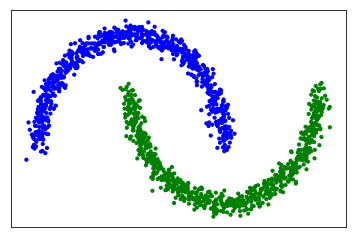

[[-0.99046891  0.36157298]
 [ 0.22409844 -0.13243265]
 [ 0.10749489  0.21398944]
 ..., 
 [ 0.45755567 -0.35817629]
 [ 0.67646982  0.76836186]
 [ 0.15049131 -0.0067354 ]]
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.335


In [4]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.2, min_samples=15)
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
#              This includes the point itself
model.fit(X)
labels = model.labels_

plt.scatter(X[:, 0], X[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.components_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))